# Christos' code below

In [1]:
import pandas as pd
# defining my personal dataframe
url = "GSAF5.xls"
df = pd.read_excel(url)
baby_shark_christos_df = df.copy()

# filling NaN values with "unknown", and stripping values frmo empty white space, as well as, lowercasing
baby_shark_christos_df["Activity"] = baby_shark_christos_df["Activity"].str.strip().str.lower()
baby_shark_christos_df["Activity"] = baby_shark_christos_df["Activity"].fillna("unknown")

# now I proceed with clustering
def map_activity_to_cluster(x: str) -> str:
    x = str(x).lower().strip()
    
    if "fell overboard" in x:
        return "boating"
    if any(word in x for word in ["surf","paddle", "boarding"]):
        return "surfing"
    if any(word in x for word in ["swim", "wading", "bathing", "treading", "standing", "floating", "playing"]):
        return "swimming"
    if "fish" in x:
        return "fishing"
    if any(word in x for word in ["dive", "snorkel", "diving"]):
        return "diving/snorkeling"
    if any(word in x for word in ["boat", "kayak", "canoe", "overboard", "rowing", "sailing"]):
        return "boating"
    if "unknown" in x:
        return "unknown"
    return "other"

# applying the function to the series
baby_shark_christos_df["Activity"] = baby_shark_christos_df["Activity"].apply(map_activity_to_cluster)

# displaying the result table
baby_shark_christos_df.head(10)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14th October,2025.0,Unprovoked,Columbia,"Bolivar, del Isolate",Catagena Province,swimming,Male child,M,14,...,Nurse shark,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,swimming,Samuel Nai,M,14,...,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,surfing,Lee Berryman,M,50+,...,Bronze whaler?,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29th September,2025.0,Unprovoked,USA,Off California,Catalina Island,swimming,Christopher Murray,M,54,...,unknown 1.2m shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27th September,2025.0,Provoked,Costa Rica,NaN,Cocos Islands,diving/snorkeling,Dr. Mauricio Hoyos,M,48,...,Tiger shark 4m,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,surfing,Mercury Psillaskis,M,57,...,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,diving/snorkeling,Richard Burrows,M,8,...,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30th August,2025.0,Unprovoked,USA,Texas,Galveston,swimming,Harper Ochoa,F,8,...,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,fishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Zeineb's code below

In [2]:
import pandas as pd
import pycountry
import re

url = "GSAF5.xls"
df_zeineb = pd.read_excel(url)

country_names = [(country.name).lower() for country in pycountry.countries]
country_names = list(map(lambda x:  re.sub('[^a-zA-Z]', '', x.lower().strip()) , country_names ))
#print(country_names)

#print(country_names)
print(len(df["Country"].unique()))
#print(df["Country"].unique())
#print(df["Country"].value_counts())
#print(df["Country"].nunique())
#print("-_-_-_-_-_-_-_-_-_-_-_-_-_-_Print duplicated sum-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-")
#print(df.duplicated(subset=['Country']).sum())


df_zeineb["Country"] = df_zeineb["Country"].fillna("Unkown Country")

df_zeineb['Country'] = df_zeineb['Country'].str.strip()
df_zeineb['Country'] = df_zeineb['Country'].apply(lambda x: re.sub('[^a-zA-Z]', '', x))
df_zeineb['Country'] = df_zeineb['Country'].apply(lambda x: x.lower())

unique_countries = df_zeineb["Country"].unique()
sorted_unique_countries = sorted(unique_countries , reverse = False)

# Display the sorted unique countries
#print(sorted_unique_countries)

def clean_country(country_to_replace, official_list):
    if country_to_replace  == "USA":
        return country_to_replace, False
    else:
        replaced = False
        for official_country in official_list:
        # Check if any part of the official country is in the country_to_replace
            if country_to_replace in official_country:
                replaced = True
                return official_country , replaced  # Return the matched official country name
        # If no match is found, return the original name
        return country_to_replace , replaced


#for country in sorted_unique_countries:
#   print(f"old country: {country} ; then new_country : { clean_country(country, country_names)}")

df_zeineb['Country'] = df_zeineb['Country'].apply(lambda country: clean_country(country, country_names)[0])
#display(df[df['Country'] != "unkowncountry"])

df_zeineb.head(10)

250


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14th October,2025.0,Unprovoked,columbia,"Bolivar, del Isolate",Catagena Province,Swimming with sharks,Male child,M,14,...,Nurse shark,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11th October,2025.0,Unprovoked,australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,...,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7th October,2025.0,Unprovoked,australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,M,50+,...,Bronze whaler?,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29th September,2025.0,Unprovoked,bonairesinteustatiusandsaba,Off California,Catalina Island,Swimming,Christopher Murray,M,54,...,unknown 1.2m shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27th September,2025.0,Provoked,costarica,NaN,Cocos Islands,Diving-Tagging sharks,Dr. Mauricio Hoyos,M,48,...,Tiger shark 4m,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6th September,2025.0,Unprovoked,australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,...,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1st September,2025.0,Unprovoked,bonairesinteustatiusandsaba,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,...,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30th August,2025.0,Unprovoked,bonairesinteustatiusandsaba,Texas,Galveston,Swimming,Harper Ochoa,F,8,...,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18th August,2025.0,Unprovoked,australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17th August,2025.0,Unprovoked,bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Zina's code below

In [3]:
import pandas as pd
import numpy as np

url = "GSAF5.xls"
df = pd.read_excel(url)
zina_df = df.copy()

word_map = {"teen": 15,"teens": 15,"young": 18,"adult": 30,"(adult)": 30,"elderly": 75,"middle age": 45,"middle-age": 45}

def extract_age(value):
    if pd.isna(value): # check if the value is missing
        return np.nan # if true : returns a missing value NaN

    value = str(value).strip().lower() #coverts to string, removes whitespace, converts to lowercase 

    for key, age in word_map.items(): #using the word_map to inter values
        if key in value:
            return age

    clean_value = value.replace("+", " ").replace("&", " ").replace("-", " ").replace(",", " ") # to remove +, &, -, -> spaces

    parts = clean_value.split() # .split() on spaces and get all the numbers
    
    numbers = []
    for part in parts:
        if part.isdigit():        # check if it is a number
            numbers.append(int(part))
            
    if numbers: #If we found numbers, return the average; example :("28 & 22", "50+", "16 to 18")
        return round(sum(numbers) / len(numbers))

    return np.nan #If nothing found, return NaN

zina_df.insert(zina_df.columns.get_loc("Age") + 1,"Age_clean",zina_df["Age"].apply(extract_age))

zina_df[["Age", "Age_clean"]].head()

cols = list(zina_df.columns)
cols.insert(cols.index("Age") - 1, cols.pop(cols.index("Age_clean")))
zina_df = zina_df.loc[:, cols]

zina_df.head(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Age_clean,Sex,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14th October,2025.0,Unprovoked,Columbia,"Bolivar, del Isolate",Catagena Province,Swimming with sharks,Male child,14.0,M,...,Nurse shark,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,14.0,M,...,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,50.0,M,...,Bronze whaler?,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29th September,2025.0,Unprovoked,USA,Off California,Catalina Island,Swimming,Christopher Murray,54.0,M,...,unknown 1.2m shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27th September,2025.0,Provoked,Costa Rica,NaN,Cocos Islands,Diving-Tagging sharks,Dr. Mauricio Hoyos,48.0,M,...,Tiger shark 4m,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,57.0,M,...,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,8.0,M,...,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30th August,2025.0,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,8.0,F,...,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,NaN,M,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,63.0,M,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Davy's code

In [4]:
import pandas as pd

url = "GSAF5.xls"
baby_shark_davy_df = pd.read_excel(url)
baby_shark_davy_df = baby_shark_davy_df.copy()

#we clean the space in the columns
baby_shark_davy_df.columns = baby_shark_davy_df.columns.str.strip()

# normalization  data's names
baby_shark_davy_df['Species'] = (
    baby_shark_davy_df['Species']
    .str.lower()
    .str.strip()
    .str.replace(r"[^a-z\s]", "", regex=True)  
)

# define the name list of Species 
species_list = [
    "great white shark",
    "tiger shark",
    "hammerhead shark",
    "bull shark",
    "whale shark",
    "mako shark",	
    "blue shark",
    "nurse shark",	
    "goblin shark",
    "greenland shark",
    "other shark",
    "None"
]

to_remove = [
    "juvenile", "female", "male", "pup", "ft", "m", "kg",
    "suspected", "reportedly", "report", "involvement", "invalid",
    "questionable", "not confirmed", "unconfirmed", "probable",
    "injury", "described", "said", "thought", "highly", "unlikely"
]

import re

def clean_text(x):
    if pd.isna(x):
        return "other shark"
    # remove the inecesary word
    for word in to_remove:
        x = re.sub(r"\b" + word + r"\b", "", x)
    # reduce or remove some spaces
    x = re.sub(r"\s+", " ", x).strip()
    return x

baby_shark_davy_df["Species_clean"] = baby_shark_davy_df["Species"].apply(clean_text)

mapping = {
    "white shark": "great white shark",
    "great white": "great white shark",
    "hammerhead": "hammerhead shark",
    "tiger": "tiger shark",
    "NaN" : "other shark",
    "nan" : "other shark",
    "identification is questionable": "no shark",
    "questionable": "no shark",
    "Unknown": "other shark",
    "undetermined": "other shark",
    "to  shark":"other shark",
    "m  shark":"other shark",
    "not stated":"other shark",
    "shark":"other shark",
    "unknown m shark":"other shark",
    "shark":"other shark",
    "no shark": "no shark",
    "not confirmed":"no shark",
    "Invalid":"no shark"
}
baby_shark_davy_df["Species"] = baby_shark_davy_df["Species"].replace(mapping).fillna('other shark')

from rapidfuzz import process

def match_species(x):
    # check if there are missing values
    if pd.isna(x):
        return "other shark"
    
    # finding matching values
    result = process.extractOne(x, species_list)
    
    if result is not None:
        match, score, _ = result
        if score > 80:   # confidence threshold
            return match
        else:
            return "other shark"
    

baby_shark_davy_df["Species_clean"] = baby_shark_davy_df["Species"].apply(match_species)

# Remplacer toutes les valeurs non comprises dans la liste par "other shark"
baby_shark_davy_df["Species"] = baby_shark_davy_df["Species"].where(baby_shark_davy_df["Species"].isin(species_list), "other shark")

cols = list(baby_shark_davy_df.columns)
cols.insert(cols.index("Source") - 1, cols.pop(cols.index("Species_clean")))
baby_shark_davy_df = baby_shark_davy_df.loc[:, cols]

baby_shark_davy_df.head(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14th October,2025.0,Unprovoked,Columbia,"Bolivar, del Isolate",Catagena Province,Swimming with sharks,Male child,M,14,...,nurse shark,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,...,other shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,M,50+,...,other shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29th September,2025.0,Unprovoked,USA,Off California,Catalina Island,Swimming,Christopher Murray,M,54,...,other shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27th September,2025.0,Provoked,Costa Rica,NaN,Cocos Islands,Diving-Tagging sharks,Dr. Mauricio Hoyos,M,48,...,other shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,...,great white shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,...,other shark,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30th August,2025.0,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,F,8,...,other shark,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,other shark,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,other shark,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merged Data

In [5]:
import pandas as pd

In [5]:
# deleting the dirty columns

clean_df = df.drop(["Activity", "Country", "Age", "Species "], axis=1)
df.head(2)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14th October,2025.0,Unprovoked,Columbia,"Bolivar, del Isolate",Catagena Province,Swimming with sharks,Male child,M,14,...,Nurse shark,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,...,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# merging the dataframes from the team members
merged_df = pd.concat(
    [
        clean_df,
        baby_shark_christos_df[["Activity"]],
        df_zeineb[["Country"]],
        zina_df[["Age_clean"]],
        baby_shark_davy_df[["Species"]],
    ],
    axis=1,
)

merged_df.head(10)

,Date,Year,Type,State,Location,Name,Sex,Injury,Fatal Y/N,Time,...,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Activity,Country,Age_clean,Species
0,14th October,2025.0,Unprovoked,"Bolivar, del Isolate",Catagena Province,Male child,M,Severe hand injury,N,Not stated,...,NaN,NaN,NaN,NaN,NaN,NaN,swimming,columbia,14.0,nurse shark
1,11th October,2025.0,Unprovoked,Queensland,Cook Esplanade Thursday Island,Samuel Nai,M,Serious abdonminal injuries,N,1823 hrs,...,NaN,NaN,NaN,NaN,NaN,NaN,swimming,australia,14.0,other shark
2,7th October,2025.0,Unprovoked,South Australia,Kangaroo Island,Lee Berryman,M,Lacerations to calf,N,1330hrs,...,NaN,NaN,NaN,NaN,NaN,NaN,surfing,australia,50.0,other shark
3,29th September,2025.0,Unprovoked,Off California,Catalina Island,Christopher Murray,M,Leg and foot injury,N,0100hrs,...,NaN,NaN,NaN,NaN,NaN,NaN,swimming,bonairesinteustatiusandsaba,54.0,other shark
4,27th September,2025.0,Provoked,NaN,Cocos Islands,Dr. Mauricio Hoyos,M,Head face and arms,N,Not stated,...,NaN,NaN,NaN,NaN,NaN,NaN,diving/snorkeling,costarica,48.0,other shark
5,6th September,2025.0,Unprovoked,NSW,Long Reef Sydney,Mercury Psillaskis,M,Both legs and arm severed,Y,0930hrs,...,NaN,NaN,NaN,NaN,NaN,NaN,surfing,australia,57.0,great white shark
6,1st September,2025.0,Unprovoked,Florida,Horseshoe reef Key Largo,Richard Burrows,M,Bite to leg,N,1524hrs,...,NaN,NaN,NaN,NaN,NaN,NaN,diving/snorkeling,bonairesinteustatiusandsaba,8.0,other shark
7,30th August,2025.0,Unprovoked,Texas,Galveston,Harper Ochoa,F,Bite to leg,N,Not stated,...,NaN,NaN,NaN,NaN,NaN,NaN,swimming,bonairesinteustatiusandsaba,8.0,other shark
8,18th August,2025.0,Unprovoked,NSW,Cabarita Beach,Brad Ross,M,None sustained board severly damaged,N,0730hrs,...,NaN,NaN,NaN,NaN,NaN,NaN,surfing,australia,NaN,other shark
9,17th August,2025.0,Unprovoked,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Not stated,M,Severe injuries no detail,N,1300hrs,...,NaN,NaN,NaN,NaN,NaN,NaN,fishing,bahamas,63.0,other shark


In [8]:
cols = list(merged_df.columns)
cols.insert(cols.index("State") - 1, cols.pop(cols.index("Country")))
merged_df = merged_df.loc[:, cols]

cols = list(merged_df.columns)
cols.insert(cols.index("Name") - 1, cols.pop(cols.index("Activity")))
merged_df = merged_df.loc[:, cols]

cols = list(merged_df.columns)
cols.insert(cols.index("Injury") - 1, cols.pop(cols.index("Species")))
merged_df = merged_df.loc[:, cols]

cols = list(merged_df.columns)
cols.insert(cols.index("Sex") - 1, cols.pop(cols.index("Age_clean")))
merged_df = merged_df.loc[:, cols]

merged_df.head(10)

,Date,Year,Country,Type,State,Activity,Location,Name,Age_clean,Species,...,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,AgeGroup
0,14th October,2025.0,columbia,Unprovoked,"Bolivar, del Isolate",swimming,Catagena Province,Male child,14.0,nurse shark,...,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Child
1,11th October,2025.0,australia,Unprovoked,Queensland,swimming,Cook Esplanade Thursday Island,Samuel Nai,14.0,other shark,...,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Child
2,7th October,2025.0,australia,Unprovoked,South Australia,surfing,Kangaroo Island,Lee Berryman,50.0,other shark,...,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older person
3,29th September,2025.0,bonairesinteustatiusandsaba,Unprovoked,Off California,swimming,Catalina Island,Christopher Murray,54.0,other shark,...,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older person
4,27th September,2025.0,costarica,Provoked,NaN,diving/snorkeling,Cocos Islands,Dr. Mauricio Hoyos,48.0,other shark,...,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older person
5,6th September,2025.0,australia,Unprovoked,NSW,surfing,Long Reef Sydney,Mercury Psillaskis,57.0,great white shark,...,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older person
6,1st September,2025.0,bonairesinteustatiusandsaba,Unprovoked,Florida,diving/snorkeling,Horseshoe reef Key Largo,Richard Burrows,8.0,other shark,...,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Child
7,30th August,2025.0,bonairesinteustatiusandsaba,Unprovoked,Texas,swimming,Galveston,Harper Ochoa,8.0,other shark,...,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Child
8,18th August,2025.0,australia,Unprovoked,NSW,surfing,Cabarita Beach,Brad Ross,NaN,other shark,...,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not categorized
9,17th August,2025.0,bahamas,Unprovoked,Atlantic Ocean near Big Grand Cay,fishing,North of Grand Bahama near Freeport,Not stated,63.0,other shark,...,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older person


In [7]:
def categorize_age(age):
    if age <= 18:
        return "Child"
    if 18 < age <= 45:
        return "Younger person"
    if 45 < age <= 80:
        return "Older person"
    else:
        return "Not categorized"

merged_df["AgeGroup"] = merged_df["Age_clean"].apply(categorize_age)

cols = list(merged_df.columns)
cols.insert(cols.index("Age_clean") + 1, cols.pop(cols.index("AgeGroup")))
merged_df = merged_df.loc[:, cols]

merged_df.head(20)

,Date,Year,Type,State,Location,Name,Sex,Injury,Fatal Y/N,Time,...,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Activity,Country,Age_clean,AgeGroup,Species
0,14th October,2025.0,Unprovoked,"Bolivar, del Isolate",Catagena Province,Male child,M,Severe hand injury,N,Not stated,...,NaN,NaN,NaN,NaN,NaN,swimming,columbia,14.0,Child,nurse shark
1,11th October,2025.0,Unprovoked,Queensland,Cook Esplanade Thursday Island,Samuel Nai,M,Serious abdonminal injuries,N,1823 hrs,...,NaN,NaN,NaN,NaN,NaN,swimming,australia,14.0,Child,other shark
2,7th October,2025.0,Unprovoked,South Australia,Kangaroo Island,Lee Berryman,M,Lacerations to calf,N,1330hrs,...,NaN,NaN,NaN,NaN,NaN,surfing,australia,50.0,Older person,other shark
3,29th September,2025.0,Unprovoked,Off California,Catalina Island,Christopher Murray,M,Leg and foot injury,N,0100hrs,...,NaN,NaN,NaN,NaN,NaN,swimming,bonairesinteustatiusandsaba,54.0,Older person,other shark
4,27th September,2025.0,Provoked,NaN,Cocos Islands,Dr. Mauricio Hoyos,M,Head face and arms,N,Not stated,...,NaN,NaN,NaN,NaN,NaN,diving/snorkeling,costarica,48.0,Older person,other shark
5,6th September,2025.0,Unprovoked,NSW,Long Reef Sydney,Mercury Psillaskis,M,Both legs and arm severed,Y,0930hrs,...,NaN,NaN,NaN,NaN,NaN,surfing,australia,57.0,Older person,great white shark
6,1st September,2025.0,Unprovoked,Florida,Horseshoe reef Key Largo,Richard Burrows,M,Bite to leg,N,1524hrs,...,NaN,NaN,NaN,NaN,NaN,diving/snorkeling,bonairesinteustatiusandsaba,8.0,Child,other shark
7,30th August,2025.0,Unprovoked,Texas,Galveston,Harper Ochoa,F,Bite to leg,N,Not stated,...,NaN,NaN,NaN,NaN,NaN,swimming,bonairesinteustatiusandsaba,8.0,Child,other shark
8,18th August,2025.0,Unprovoked,NSW,Cabarita Beach,Brad Ross,M,None sustained board severly damaged,N,0730hrs,...,NaN,NaN,NaN,NaN,NaN,surfing,australia,NaN,Not categorized,other shark
9,17th August,2025.0,Unprovoked,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Not stated,M,Severe injuries no detail,N,1300hrs,...,NaN,NaN,NaN,NaN,NaN,fishing,bahamas,63.0,Older person,other shark


# Hypothesis

## Young surfers and divers in countries with high shark population are more likely to be attacked by predatory sharks, compared to older people swimming or go fishing

### Checking the relation between countries and activities to shark attacks

In [24]:
# Step 1: Filter the DataFrame for Activity == "Surfing"
activity_country_df = merged_df[merged_df['Activity'].isin(['surfing', 'diving/snorkeling', 'swimming', 'fishing'])]

# Step 2: Group by Country and count Activities
activity_country_df = activity_country_df.groupby(['Country', 'Activity'])['Activity'].agg(['count'])

# Step 3: Filter countries with more than 100 "Attack" or "Snorkeling" activities
activity_country_df = activity_country_df[activity_country_df['count'] > 20]

# Display the result
display(activity_country_df)

count
Country                     Activity                
australia                   diving/snorkeling    192
                            fishing              292
                            surfing              352
                            swimming             368
bahamas                     diving/snorkeling     34
                            fishing               57
bonairesinteustatiusandsaba diving/snorkeling    171
                            fishing              331
                            surfing              930
                            swimming             735
brazil                      surfing               46
                            swimming              44
egypt                       diving/snorkeling     26
fiji                        fishing               23
italy                       fishing               26
mexico                      swimming              46
mozambique                  swimming              25
newcaledonia                fishing               26
newzealand                  fishing               38
                            surfing               24
                            swimming              46
papuanewguinea              fishing               55
                            swimming              29
reunion                     surfing               34
southafrica                 diving/snorkeling     31
                            fishing              140
                            surfing              169
                            swimming             162
spain                       swimming              26

In [34]:
activity_country_pivot_df = activity_country_df.pivot_table(index='Country', columns='Activity', aggfunc='sum')
display(activity_country_pivot_df)


count                         
Activity                    diving/snorkeling fishing surfing swimming
Country                                                               
australia                               192.0   292.0   352.0    368.0
bahamas                                  34.0    57.0     NaN      NaN
bonairesinteustatiusandsaba             171.0   331.0   930.0    735.0
brazil                                    NaN     NaN    46.0     44.0
egypt                                    26.0     NaN     NaN      NaN
fiji                                      NaN    23.0     NaN      NaN
italy                                     NaN    26.0     NaN      NaN
mexico                                    NaN     NaN     NaN     46.0
mozambique                                NaN     NaN     NaN     25.0
newcaledonia                              NaN    26.0     NaN      NaN
newzealand                                NaN    38.0    24.0     46.0
papuanewguinea                            NaN    55.0     NaN     29.0
reunion                                   NaN     NaN    34.0      NaN
southafrica                              31.0   140.0   169.0    162.0
spain                                     NaN     NaN     NaN     26.0

### Chceking the relation between age and activity

In [25]:

activity_age_df = merged_df[merged_df['AgeGroup'].isin(['Younger person', 'Older person'])]

# Step 2: Group by AgeGroup and count Activities
activity_age_df = activity_age_df.groupby(['AgeGroup', 'Activity'])['AgeGroup'].agg(['count'])

# Step 3: Filter countries with more than 10 "Attack" activities
activity_age_df = activity_age_df[activity_age_df['count'] > 10]

# Display the result
display(activity_age_df)

count
AgeGroup       Activity                
Older person   boating               14
               diving/snorkeling     85
               fishing               97
               other                 27
               surfing              148
               swimming             169
               unknown               13
Younger person boating               42
               diving/snorkeling    249
               fishing              414
               other                127
               surfing              723
               swimming             556
               unknown               75

In [31]:
activity_age_pivot_df = activity_age_df.pivot_table(index='AgeGroup', columns='Activity' , aggfunc='sum')
activity_age_pivot_df.head(20)

count                                                   \
Activity       boating diving/snorkeling fishing other surfing swimming   
AgeGroup                                                                  
Older person        14                85      97    27     148      169   
Younger person      42               249     414   127     723      556   

                        
Activity       unknown  
AgeGroup                
Older person        13  
Younger person      75

### Checking the relatioship between species and country

In [35]:

country_species_df = merged_df[merged_df['Species'] != 'other shark']

# Step 2: Group by Country and count Activities
species_count_df = country_species_df.groupby(['Country', 'Species'])['Species'].agg(['count'])

# Step 3: Filter countries with more than 100 "Attack" or "Snorkeling" activities
species_count_df = species_count_df[species_count_df['count'] > 5]

# Display the result
display(species_count_df)

count
Country                     Species                 
australia                   bull shark            24
                            great white shark     56
                            tiger shark           12
bahamas                     bull shark             6
bonairesinteustatiusandsaba bull shark            24
                            great white shark     60
                            hammerhead shark       8
                            mako shark             6
                            nurse shark           15
                            tiger shark           37
croatia                     great white shark      7
italy                       great white shark      9
newcaledonia                tiger shark            7
newzealand                  great white shark      7
southafrica                 great white shark     41

### Adding activity to the above

In [47]:

species_activity_df = merged_df[merged_df['Species'] != 'other shark']
species_activity_df = species_activity_df[species_activity_df['Activity'] != 'other']

# Step 2: Group by Country and count Activities
species_activity_df = species_activity_df.groupby(['Species', 'Activity', ])['Activity'].agg(['count'])

# Step 3: Filter countries with more than 100 "Attack" or "Snorkeling" activities
species_activity_df = species_activity_df[species_activity_df['count'] > 5]

# Display the result
display(species_activity_df)

count
Species           Activity                
bull shark        diving/snorkeling      6
                  fishing               19
                  surfing               13
                  swimming              35
                  unknown                7
great white shark boating               14
                  diving/snorkeling     25
                  fishing               61
                  surfing               62
                  swimming              32
                  unknown                6
hammerhead shark  fishing                6
mako shark        fishing                6
nurse shark       diving/snorkeling      6
                  swimming               7
tiger shark       diving/snorkeling     18
                  fishing               20
                  surfing               26
                  swimming              23

In [49]:
species_activity_pivot_df = species_activity_df.pivot_table(index='Species', columns='Activity' , aggfunc='sum')
display(species_activity_pivot_df)

count                                                   
Activity          boating diving/snorkeling fishing surfing swimming unknown
Species                                                                     
bull shark            NaN               6.0    19.0    13.0     35.0     7.0
great white shark    14.0              25.0    61.0    62.0     32.0     6.0
hammerhead shark      NaN               NaN     6.0     NaN      NaN     NaN
mako shark            NaN               NaN     6.0     NaN      NaN     NaN
nurse shark           NaN               6.0     NaN     NaN      7.0     NaN
tiger shark           NaN              18.0    20.0    26.0     23.0     NaN

### Now aggregating country, activity, and age

In [23]:
filter1_df = merged_df[merged_df['AgeGroup'].isin(['Younger person', 'Older person'])]
filter2_df = filter1_df[filter1_df['Species'] != 'other shark']
filter3_df = filter2_df[filter2_df['Activity'].isin(['surfing', 'diving/snorkeling', 'swimming', 'fishing'])]


# Step 2: Group by Country and count Activities
multiple_count = filter3_df.groupby(['AgeGroup', 'Species', 'Activity'])['Activity'].agg(['count'])

# Step 3: Filter countries with more than 100 "Attack" or "Snorkeling" activities
multiple_count = multiple_count[multiple_count['count'] > 5]

# Display the result
display(multiple_count)

count
AgeGroup       Species           Activity                
Older person   great white shark surfing               11
Younger person bull shark        fishing                6
                                 surfing                7
                                 swimming               9
               great white shark diving/snorkeling     13
                                 fishing               19
                                 surfing               32
                                 swimming              15
               tiger shark       diving/snorkeling      6
                                 fishing                7
                                 surfing                8
                                 swimming              12

# Visualizations

#import matplotlib.pyplot as plt

#activity_country_df
#activity_country_pivot_df
#activity_age_df
#activity_age_pivot_df
#species_count_df
#country_species_activity_df_2
#multiple_count


## Univariate analysis

In [17]:
import matplotlib.pyplot as plt

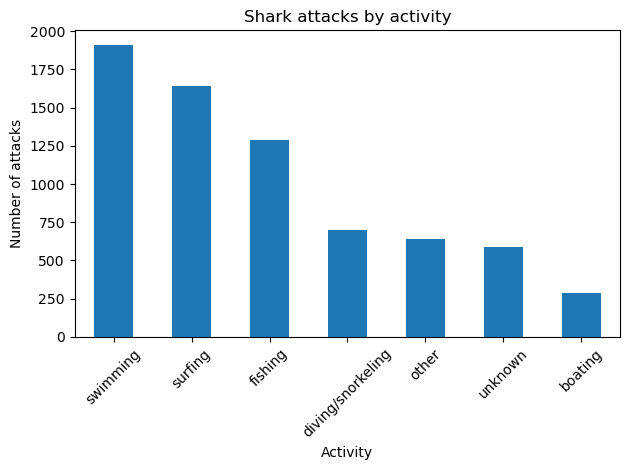

In [18]:
# plot for shark attacks per activity
merged_df["Activity"].value_counts().plot(kind="bar", rot=45)
plt.xlabel("Activity")
plt.ylabel("Number of attacks")
plt.title("Shark attacks by activity")
plt.tight_layout()


In [19]:
merged_df["Age_clean"].isnull().sum()

np.int64(3063)

In [20]:
merged_df["AgeGroup"].value_counts()

AgeGroup
Not categorized    3069
Younger person     2186
Child              1242
Older person        553
Name: count, dtype: int64

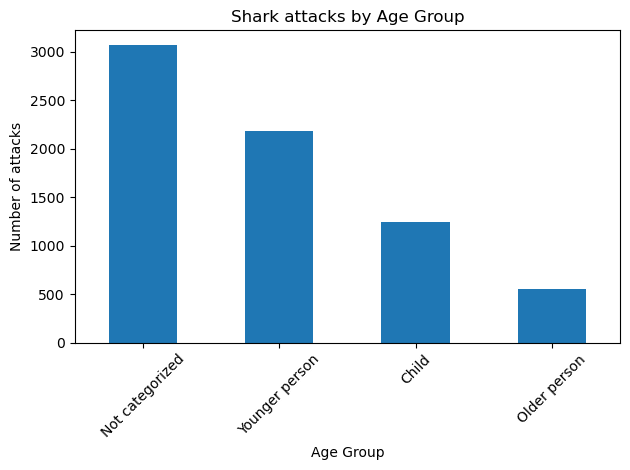

In [39]:
# plot for shark attacks per age group
import matplotlib.pyplot as plt
merged_df["AgeGroup"].value_counts().plot(kind="bar", rot=45)
plt.xlabel("Age Group")
plt.ylabel("Number of attacks")
plt.title("Shark attacks by Age Group")
plt.tight_layout()


In [40]:
# descriptive statistics on attacks per age
merged_df["Age_clean"].describe()

count    3987.000000
mean       28.067971
std        14.638567
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: Age_clean, dtype: float64

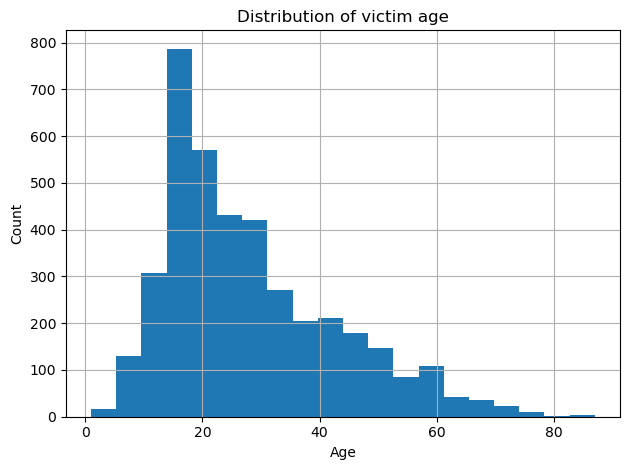

In [41]:
# plot for numerical value of age
merged_df["Age_clean"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of victim age")
plt.tight_layout()


## Mutlivariate analysis

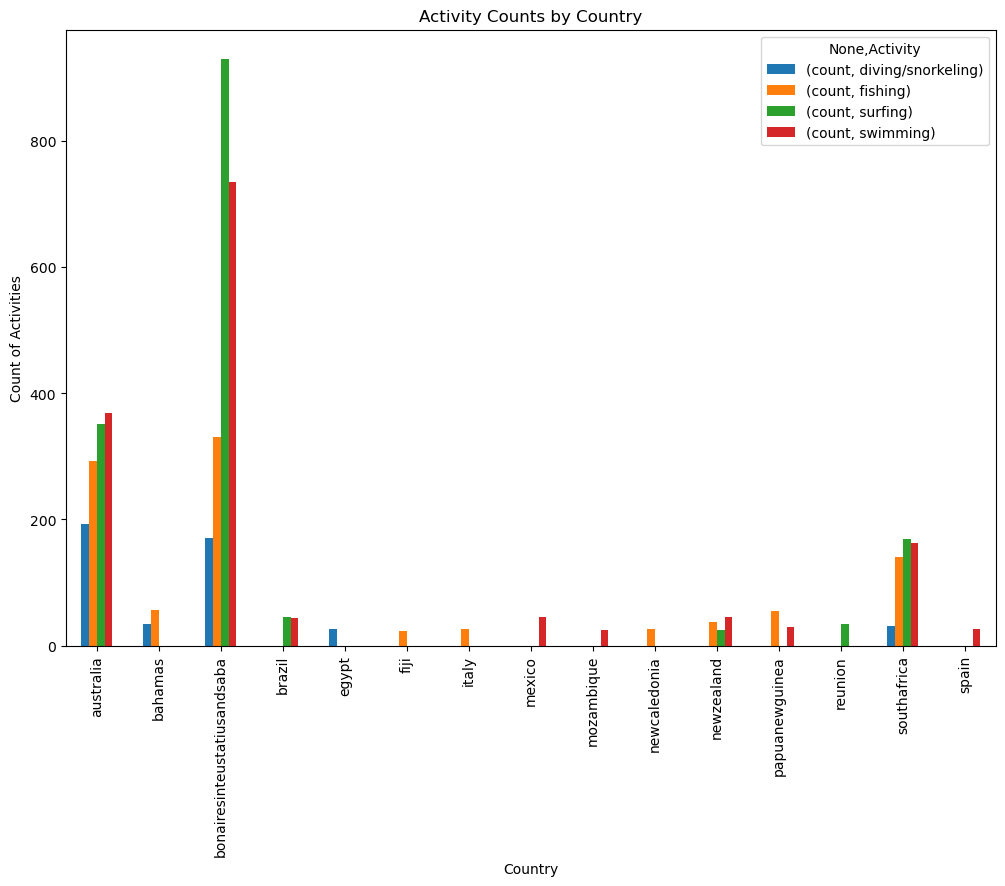

In [43]:
import matplotlib.pyplot as plt

# Plotting a bar chart
activity_country_pivot_df.plot(kind='bar', title='Activity Counts by Country', figsize=(12, 8))
plt.xlabel('Country')
plt.ylabel('Count of Activities Per Country')
plt.show()


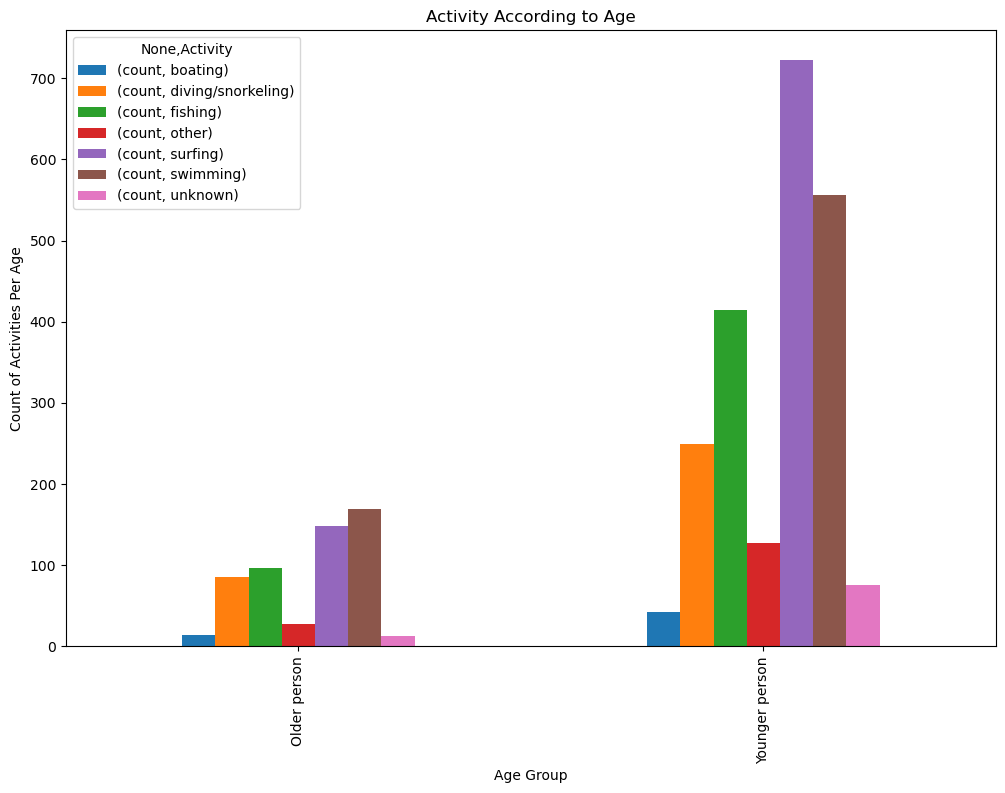

In [46]:
import matplotlib.pyplot as plt

# Plotting a bar chart
activity_age_pivot_df.plot(kind='bar', title='Activity According to Age', figsize=(12, 8))
plt.xlabel('Age Group')
plt.ylabel('Count of Activities Per Age')
plt.show()

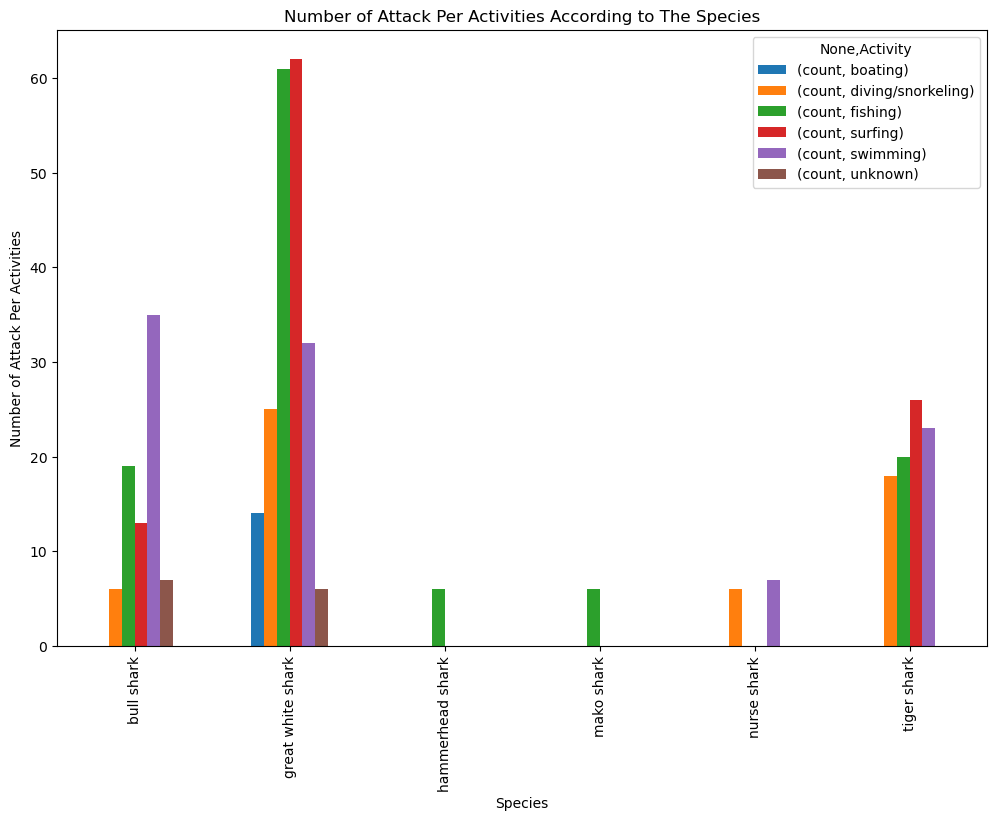

In [50]:
import matplotlib.pyplot as plt

# Plotting a bar chart
species_activity_pivot_df.plot(kind='bar', title='Number of Attack Per Activities According to The Species', figsize=(12, 8))
plt.xlabel('Species')
plt.ylabel('Number of Attack Per Activities')
plt.show()

# Apendix

In [11]:
pivot_df = merged_df.pivot_table(index='Country', columns='Activity', aggfunc='count')
pivot_df.head(20)

Age_clean                                          \
Activity                 boating diving/snorkeling fishing other surfing   
Country                                                                    
admiraltyislands             NaN               NaN     NaN   NaN     NaN   
algeria                      NaN               NaN     NaN   NaN     NaN   
americansamoa                NaN               NaN     1.0   1.0     0.0   
andamanislands               0.0               NaN     NaN   NaN     NaN   
andamannicobarislandas       NaN               NaN     NaN   1.0     NaN   
angola                       NaN               NaN     NaN   NaN     0.0   
antiguaandbarbuda            NaN               NaN     NaN   NaN     NaN   
argentina                    NaN               NaN     NaN   NaN     NaN   
aruba                        NaN               NaN     NaN   1.0     NaN   
asia                         NaN               NaN     NaN   NaN     NaN   
atlanticocean                3.0               NaN     NaN   1.0     NaN   
australia                   16.0             108.0   130.0  52.0   265.0   
azores                       NaN               NaN     1.0   NaN     NaN   
bahamas                      2.0              24.0    40.0   5.0     2.0   
bahrein                      NaN               0.0     NaN   NaN     NaN   
bangladesh                   NaN               NaN     NaN   0.0     NaN   
barbados                     NaN               0.0     1.0   0.0     NaN   
bayofbengal                  NaN               NaN     NaN   0.0     NaN   
belize                       NaN               1.0     1.0   1.0     NaN   
bermuda                      0.0               1.0     2.0   0.0     1.0   

                                        Case Number                            \
Activity               swimming unknown     boating diving/snorkeling fishing   
Country                                                                         
admiraltyislands            NaN     1.0         NaN               NaN     NaN   
algeria                     0.0     NaN         NaN               NaN     NaN   
americansamoa               2.0     0.0         NaN               NaN     3.0   
andamanislands              NaN     NaN         1.0               NaN     NaN   
andamannicobarislandas      NaN     NaN         NaN               NaN     NaN   
angola                      NaN     NaN         NaN               NaN     NaN   
antiguaandbarbuda           0.0     0.0         NaN               NaN     NaN   
argentina                   1.0     1.0         NaN               NaN     NaN   
aruba                       NaN     NaN         NaN               NaN     NaN   
asia                        0.0     NaN         NaN               NaN     NaN   
atlanticocean               0.0     1.0        10.0               NaN     NaN   
australia                 244.0    30.0        61.0             186.0   283.0   
azores                      NaN     0.0         NaN               NaN     3.0   
bahamas                    14.0     3.0         4.0              31.0    55.0   
bahrein                     NaN     NaN         NaN               1.0     NaN   
bangladesh                  NaN     NaN         NaN               NaN     NaN   
barbados                    1.0     NaN         NaN               1.0     1.0   
bayofbengal                 NaN     NaN         NaN               NaN     NaN   
belize                      2.0     0.0         NaN               1.0     2.0   
bermuda                     3.0     1.0         1.0               1.0     5.0   

                        ... original order                      pdf  \
Activity                ...        surfing swimming unknown boating   
Country                 ...                                           
admiraltyislands        ...            NaN      NaN     1.0     NaN   
algeria                 ...            NaN      1.0     NaN     NaN   
americansamoa           ...            1.0      3.0    

In [ ]:
# Pivot the DataFrame to see the {xx1} based on the {xx2} and {xx3}
pivot_df = merged_df.pivot_table(index='series1', columns='series2', values=['value_series'], aggfunc='function_name')

In [ ]:
# Create a multi-index DataFrame using set_index with {xx1} and {xx2} as the index columns
df_multiindex = merged_df.set_index(['series1', 'series2'])
df_multiindex

In [ ]:
# Stack the DataFrame to convert columns into rows and create a Series
stacked_data = merged_df_multiindex.stack()
stacked_data

In [ ]:
# for aggregation
grouped = merged_df.groupby('series')
grouped

In [ ]:
# how to get group
grouped.get_group('female')

In [ ]:
# when we want to aggregate
merged_df.groupby('series1')['series2'].agg(['count', 'mean', 'std'])